In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
% matplotlib inline

sns.set_context('poster')

In [84]:
pred = np.load('pred.npy')
testY = np.load('testY.npy')
testY = np.reshape(testY, (testY.shape[0],1))
testY.shape


(186252, 1)

In [85]:
pred.shape

(186252, 1)

In [86]:
testY.shape

(186252, 1)

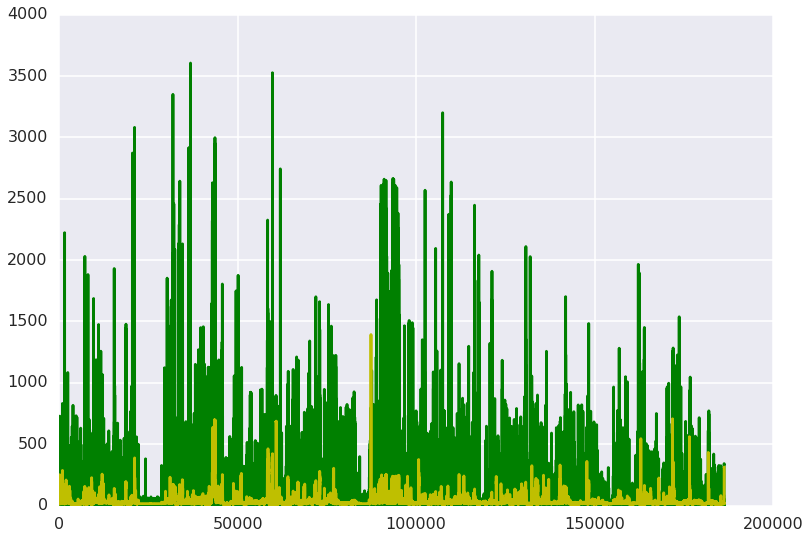

In [87]:
plt.plot(testY, 'g')
plt.plot(pred, 'y')
plt.show()

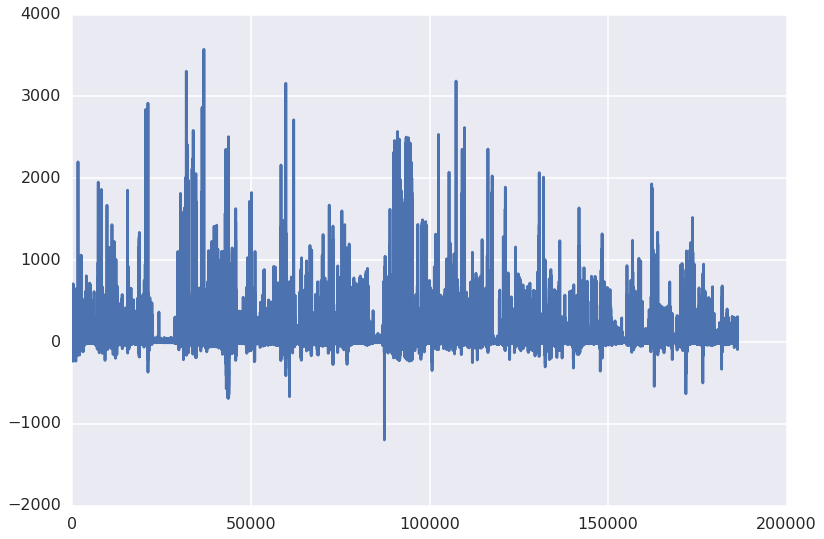

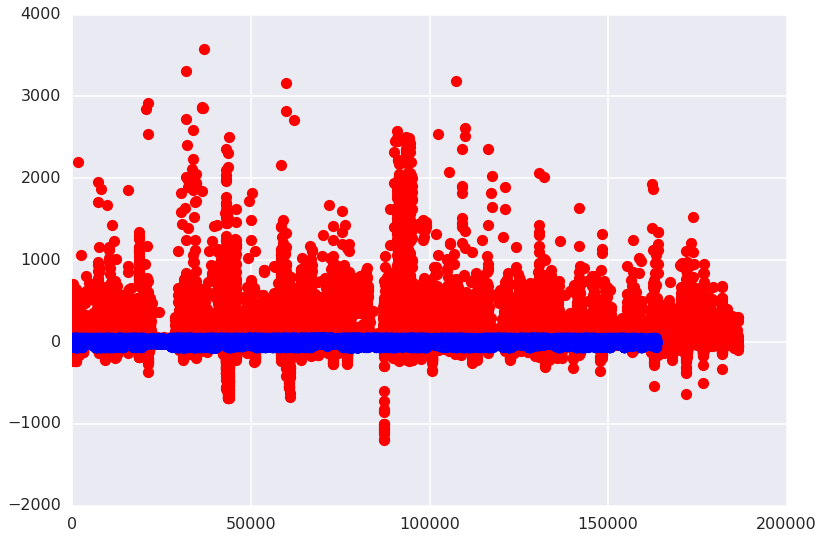

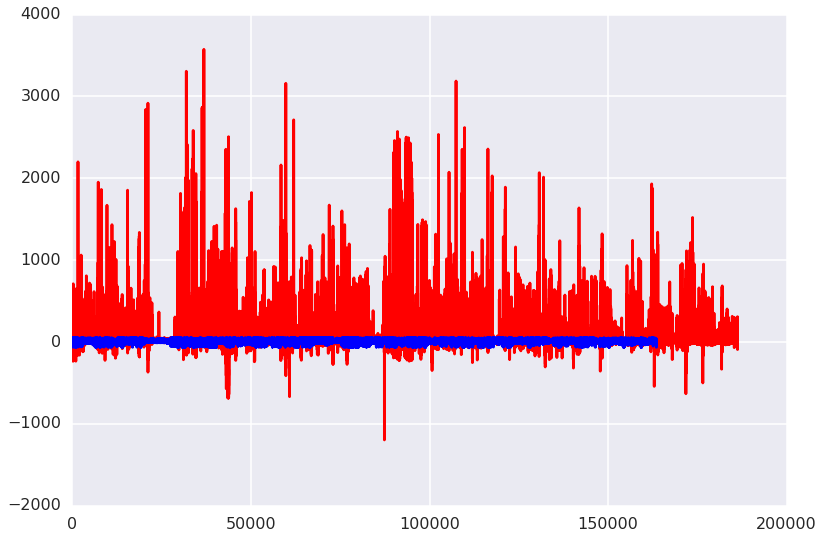

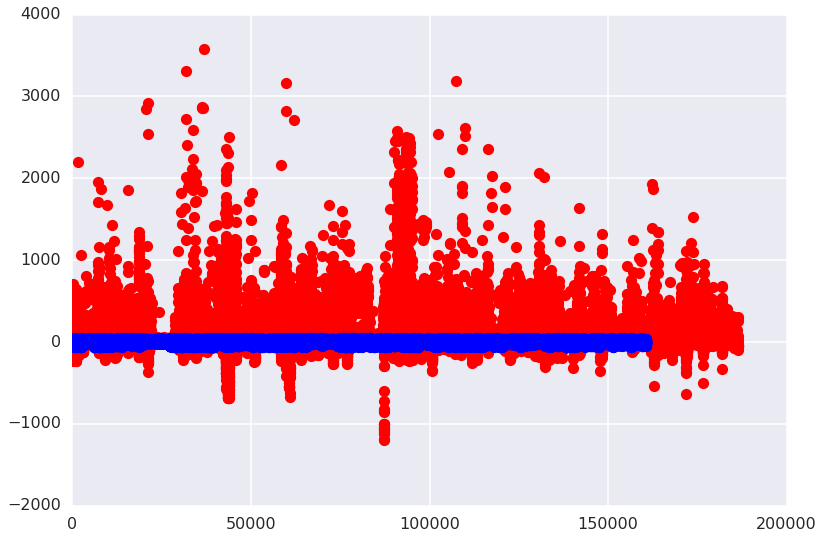

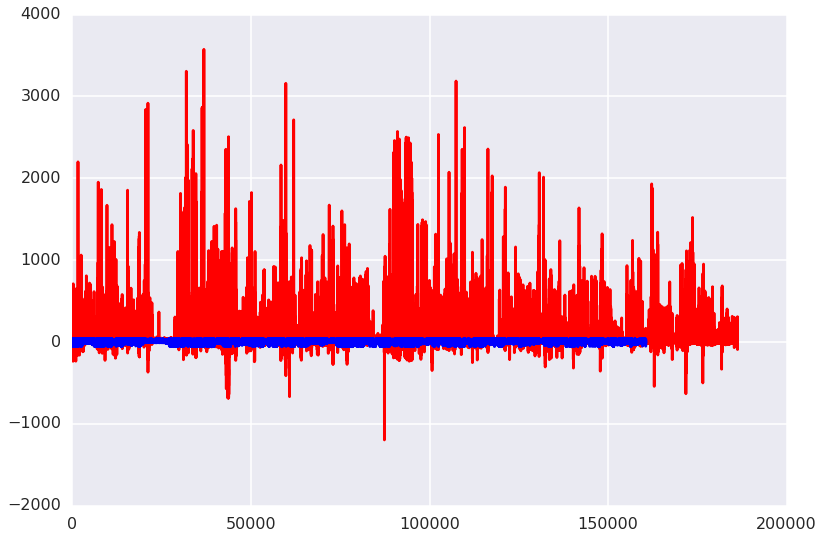

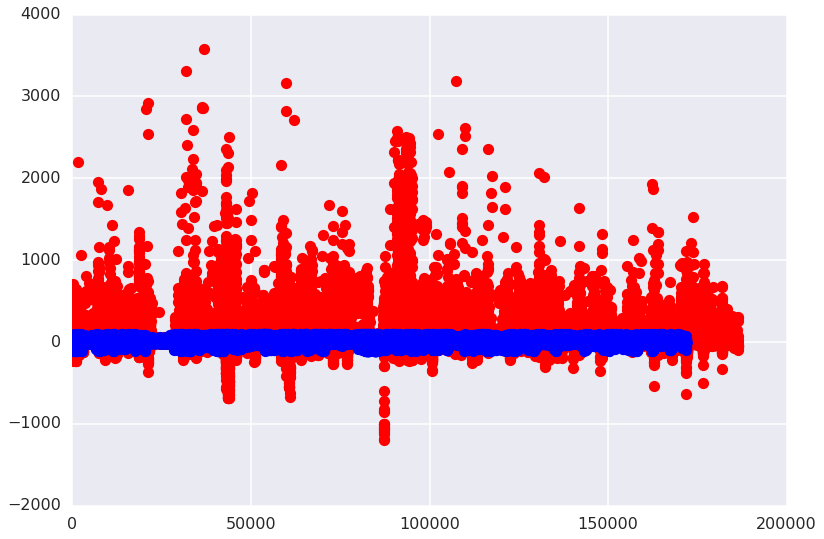

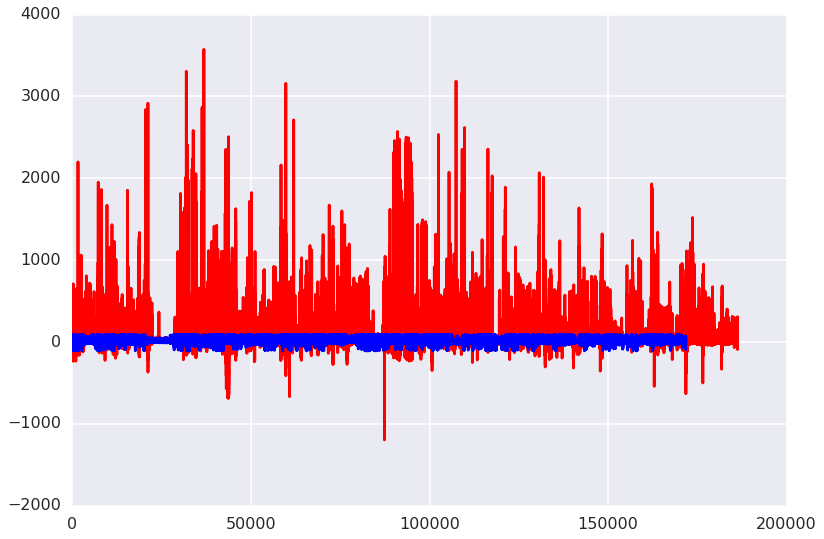

In [88]:
errors = testY - pred
plt.plot(errors)
plt.show()

res = is_outlier(errors, thresh=3.5)

plt.plot(errors, 'ro')
plt.plot(errors[~res], 'bo')
plt.show()

plt.plot(errors, 'r')
plt.plot(errors[~res], 'b')
plt.show()

res = is_outlier(errors, thresh=3)

plt.plot(errors, 'ro')
plt.plot(errors[~res], 'bo')
plt.show()

plt.plot(errors, 'r')
plt.plot(errors[~res], 'b')
plt.show()

res = is_outlier(errors, thresh=6)

plt.plot(errors, 'ro')
plt.plot(errors[~res], 'bo')
plt.show()

plt.plot(errors, 'r')
plt.plot(errors[~res], 'b')
plt.show()


59.5843224208


IndexError: index 16 is out of bounds for axis 0 with size 16

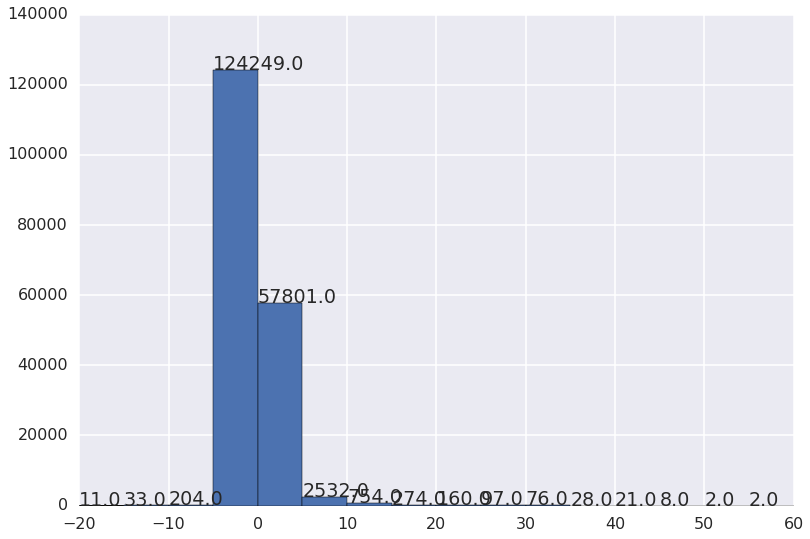

In [96]:
errs = errors/60
print(np.max(errs))
bins=[-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60]
arr= plt.hist(errs, bins=bins)
for i in range(len(bins)):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

arr2 = plt.hist(np.absolute(errs), bins=bins)
for i in range(len(bins)):
    plt.text(arr2[1][i],arr2[0][i],str(arr2[0][i]))
plt.show()
# i_1=0
# i_2=0
# i_3 = 0
# i_4 = 0
# i_5 = 0
# i_10 = 0
# i_20 = 0
# i_30=0
# i_40 =0
# i_50 = 0
# i_60=0
# for err in errors:
#     if np.absolute(err/ 60)<=3:
#         i+=1
# print('total values with error less than 3 minutes : {}  percentage :{} %'.format(i, (i/len(errors) *100)))

# max_err = np.max(np.absolute(errors))
# print('max error :{}  minutes'.format(max_err/60))

In [26]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

(7,)


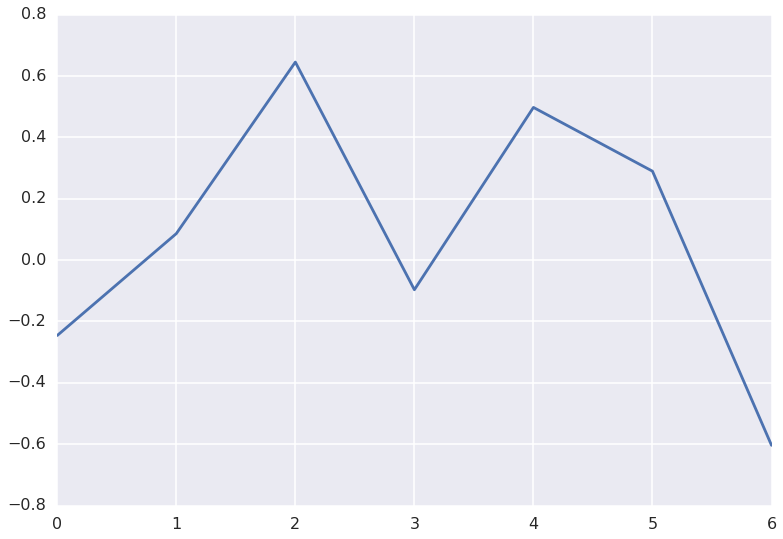

(10,)


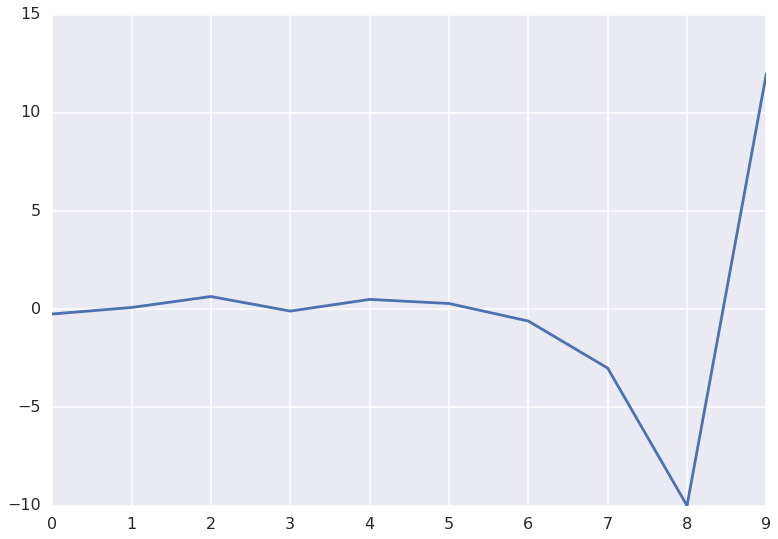

(10, 1)

In [32]:
x = np.random.normal(0, 0.5, 10-3)
print(x.shape)
plt.plot(x)
plt.show()

x = np.r_[x, -3, -10, 12]
print(x.shape)
plt.plot(x)
plt.show()

len(x.shape)
x = x[:, None]
x.shape

In [33]:
res = is_outlier(x)

In [34]:
res

array([False, False, False, False, False, False, False,  True,  True,  True], dtype=bool)

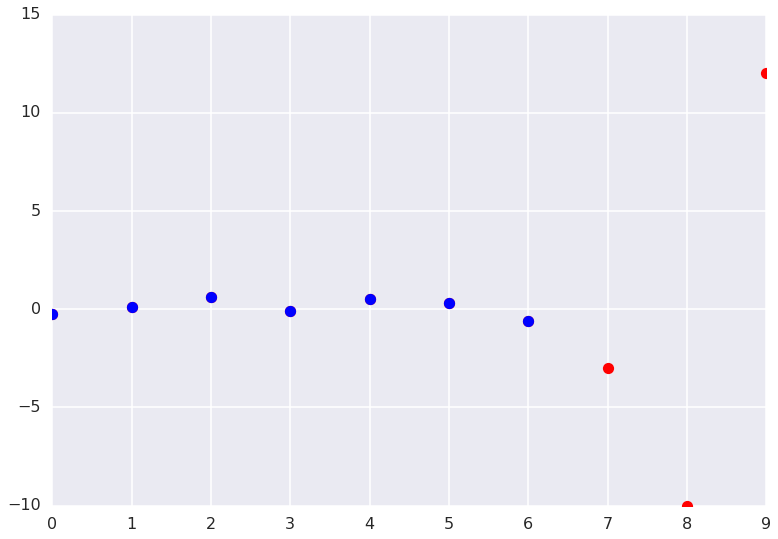

In [52]:
plt.plot(x, 'ro')
plt.plot(x[~res], 'bo')
plt.show()

# res[~not]

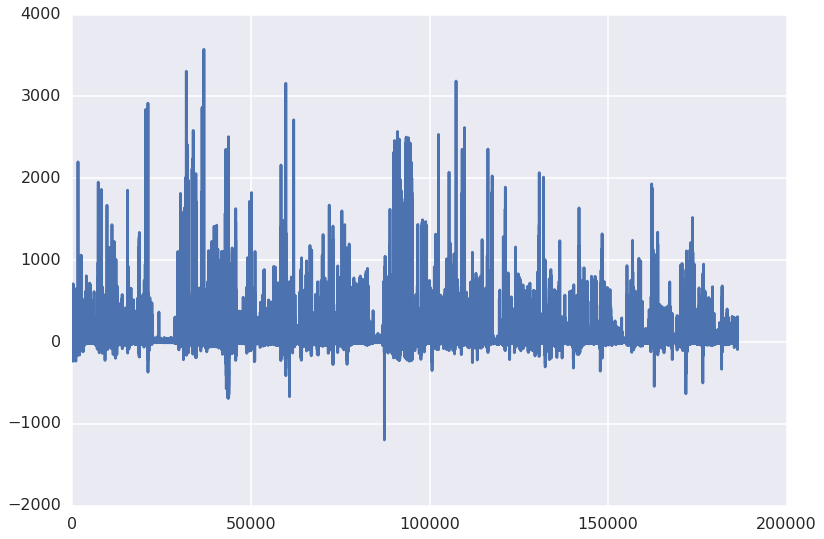

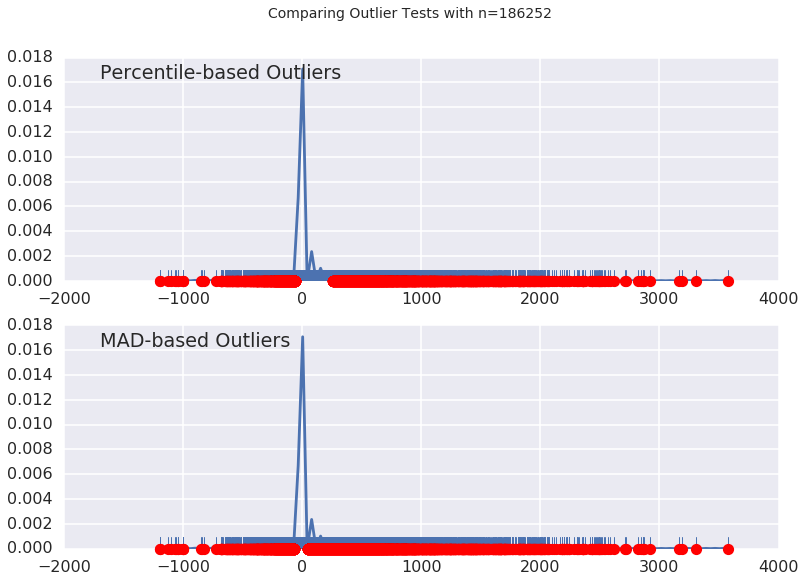

In [16]:
def main():
    pred = np.load('pred.npy')
    testY = np.load('testY.npy')
    testY = np.reshape(testY,(testY.shape[0],1))
    
    errors = testY - pred
    plt.plot(errors)
    plt.show()
    
    plot(errors)
    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

In [99]:
# GAUssian Mixture Model

from sklearn import mixture
 
def fit_samples(samples):
    gmix = mixture.GMM(n_components=2, covariance_type='full')
    gmix.fit(samples)
    print(gmix.means_)
    colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colors, alpha=0.8)
    plt.show()

In [113]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import matplotlib.mlab as mlab
# from __future__ import print
 
def q(x, y):
	g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
	g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
	return 0.6*g1+28.4*g2/(0.6+28.4)
 
def plot_q():
	fig = plt.figure()
	ax = fig.gca(projection='3d')
	X = np.arange(-5, 5, 0.1)
	Y = np.arange(-5, 5, 0.1)
	X, Y = np.meshgrid(X, Y)
	Z = q(X, Y)
	surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'),
			linewidth=0, antialiased=True)
	fig.colorbar(surf, shrink=0.5, aspect=5)
 
	plt.savefig('3dgauss.png')
	plt.clf()
 
def sample():
	'''Metropolis Hastings'''
	N = 10000
	s = 10
	r = np.zeros(2)
	p = q(r[0], r[1])
	print(p)
	samples = []
	for i in range(N):
		rn = r + np.random.normal(size=2)
		pn = q(rn[0], rn[1])
		if pn >= p:
			p = pn
			r = rn
		else:
			u = np.random.rand()
			if u < pn/p:
				p = pn
				r = rn
		if i % s == 0:
			samples.append(r)
 
	samples = np.array(samples)
	plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
 
	'''Plot target'''
	dx = 0.01
	x = np.arange(np.min(samples), np.max(samples), dx)
	y = np.arange(np.min(samples), np.max(samples), dx)
	X, Y = np.meshgrid(x, y)
	Z = q(X, Y)
	CS = plt.contour(X, Y, Z, 10, alpha=0.5)
	plt.clabel(CS, inline=1, fontsize=10)
	plt.savefig("samples.png")
	return samples
 
def fit_samples(samples):
	gmix = mixture.GMM(n_components=2, covariance_type='full')
	gmix.fit(samples)
	print(gmix.means_)
	colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
	ax = plt.gca()
	ax.scatter(samples[:,0], c=colors, alpha=0.8)
	plt.savefig("class.png")

In [114]:
# plot_q()
# s = sample()
# print(s.shape)
# fit_samples(s)

[[  -8.30167421]
 [ 139.67835805]]


/cvmfs/sft.cern.ch/lcg/views/LCG_88Py3/x86_64-slc6-gcc62-opt/lib/python3.5/site-packages/ipykernel/__main__.py:67: RuntimeWarning: Tried to set a label via parameter 'y' in func 'scatter' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)


TypeError: scatter() missing 1 required positional argument: 'y'

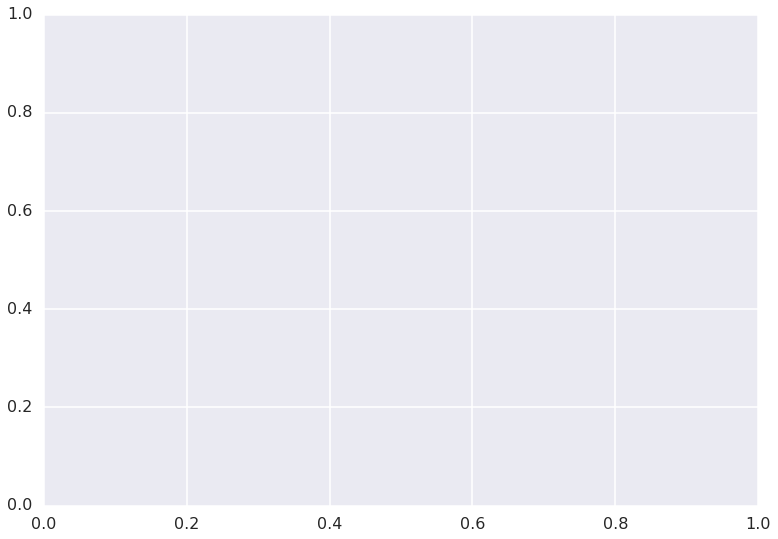

In [115]:
fit_samples(errors)